# Project5: Niraj 
## Accident time series EDA



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.cluster import KMeans


In [37]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [38]:
# Read the saved csv from the earlier notebook and set the index to the date_time column

df_accident_ts = pd.read_csv("./data/accident_ts_10years.csv", parse_dates= ['date_time'], index_col="date_time")

/Users/sarniraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (3,6,8,11,20,24,26,28,30,32,34,36,38,40,42,44,48,50,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
df_accident_ts.reset_index()
df_accident_ts.sort_index(inplace=True)

In [40]:
type( df_accident_ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [41]:
# DateTime index should be like: Index: 102385 entries, 2018-01-05 06:00:00 to 2020-12-24 09:25:00
df_accident_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353764 entries, 2010-01-01 00:01:00 to 2020-12-31 23:51:00
Data columns (total 52 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 353764 non-null  int64  
 1   month                353764 non-null  int64  
 2   monthname            203465 non-null  object 
 3   day                  353764 non-null  int64  
 4   day_week             353764 non-null  int64  
 5   day_weekname         203465 non-null  object 
 6   hour                 353764 non-null  int64  
 7   hourname             203465 non-null  object 
 8   minute               353764 non-null  int64  
 9   state                353764 non-null  int64  
 10  statename            203465 non-null  object 
 11  county               353764 non-null  int64  
 12  st_case              353764 non-null  int64  
 13  ve_total             353764 non-null  int64  
 14  ve_forms             353764 non-nu

In [42]:
df_accident_ts.dtypes

year                     int64
month                    int64
monthname               object
day                      int64
day_week                 int64
day_weekname            object
hour                     int64
hourname                object
minute                   int64
state                    int64
statename               object
county                   int64
st_case                  int64
ve_total                 int64
ve_forms                 int64
pvh_invl               float64
peds                     int64
persons                  int64
city                     int64
cityname                object
latitude               float64
longitud               float64
harm_ev                  int64
harm_evname             object
man_coll                 int64
man_collname            object
wrk_zone                 int64
wrk_zonename            object
rel_road                 int64
rel_roadname            object
lgt_cond                 int64
lgt_condname            object
weather 

In [43]:
 df_accident_ts.head() # nothing exciting...

,year,month,monthname,day,day_week,day_weekname,hour,hourname,minute,state,...,arr_min,arr_minname,fatals,drunk_dr,day_3hr_window,day_3hr_window_name,day_2hr_window,day_2hr_window_name,day_4hr_window,day_4hr_window_name
date_time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:01:00,2010,1,NaN,1,6,NaN,0,NaN,1,15,...,23,NaN,1,1,41,NaN,61,NaN,31,NaN
2010-01-01 00:07:00,2010,1,NaN,1,6,NaN,0,NaN,7,35,...,99,NaN,2,2,41,NaN,61,NaN,31,NaN
2010-01-01 00:17:00,2010,1,NaN,1,6,NaN,0,NaN,17,28,...,3,NaN,1,1,41,NaN,61,NaN,31,NaN
2010-01-01 00:17:00,2010,1,NaN,1,6,NaN,0,NaN,17,37,...,99,NaN,1,1,41,NaN,61,NaN,31,NaN
2010-01-01 00:19:00,2010,1,NaN,1,6,NaN,0,NaN,19,39,...,34,NaN,1,1,41,NaN,61,NaN,31,NaN


In [44]:
# Drop Unnamed column if it exists
#df_accident_ts.drop(columns="Unnamed: 0", inplace=True)

In [45]:
df_accident_ts.isnull().sum()

year                        0
month                       0
monthname              150299
day                         0
day_week                    0
day_weekname           150299
hour                        0
hourname               150299
minute                      0
state                       0
statename              150299
county                      0
st_case                     0
ve_total                    0
ve_forms                    0
pvh_invl                30075
peds                        0
persons                     0
city                        0
cityname               182586
latitude                    0
longitud                    0
harm_ev                     0
harm_evname            150299
man_coll                    0
man_collname           150299
wrk_zone                    0
wrk_zonename           150299
rel_road                    0
rel_roadname           150299
lgt_cond                    0
lgt_condname           150299
weather                     0
weathernam

In [46]:
df_accident_ts.index.isnull().sum() # removed all nulls before creating the index and saving to csv (in earlier notebook)

0

In [47]:
# See relavant accident data 
df_accident_ts[['year', "month", "day_week", "hour", "minute", "day_3hr_window", "day_3hr_window_name", "fatals", "drunk_dr"]]
#df_accident_ts[['year', "month", "day", "hour", "minute", "date_time", "day_3hr_window"]]

,year,month,day_week,hour,minute,day_3hr_window,day_3hr_window_name,fatals,drunk_dr
date_time,,,,,,,,,
2010-01-01 00:01:00,2010,1,6,0,1,41,NaN,1,1
2010-01-01 00:07:00,2010,1,6,0,7,41,NaN,2,2
2010-01-01 00:17:00,2010,1,6,0,17,41,NaN,1,1
2010-01-01 00:17:00,2010,1,6,0,17,41,NaN,1,1
2010-01-01 00:19:00,2010,1,6,0,19,41,NaN,1,1
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:32:00,2020,12,5,23,32,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:36:00,2020,12,5,23,36,40,Thursday 21:00 to 24:00,1,0
2020-12-31 23:50:00,2020,12,5,23,50,40,Thursday 21:00 to 24:00,1,0


### Draw graphs showing fatalities in our 2-, 3- and 4-hour windows

<Figure size 720x864 with 0 Axes>

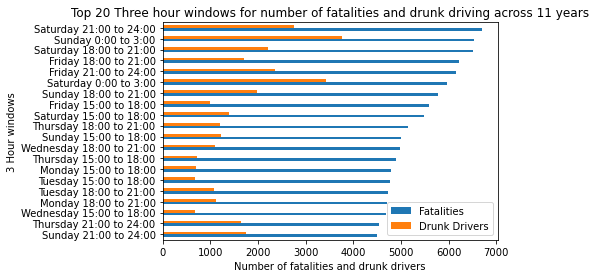

In [14]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Three hour windows for number of fatalities and drunk driving across 11 years");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("3 Hour windows");
plt.legend(labels=labels);




<Figure size 720x864 with 0 Axes>

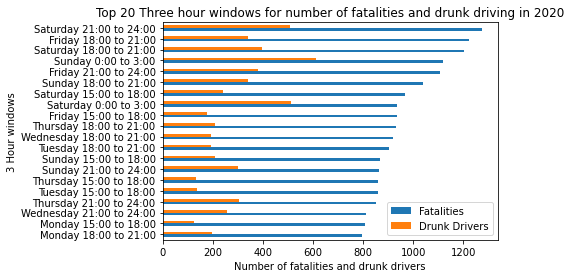

In [15]:
# Just in 2020 - not needed; percent is more relevant to compare with holiday percentages in 2020
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];


df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Three hour windows for number of fatalities and drunk driving in 2020");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("3 Hour windows");
plt.legend(labels=labels);



### **Interpretation** : 
The most number of fatal accidents are on Saturdays from 9pm-midnight (last row), followed by Saturdays 12:01 to 3am. 
The most fatal accidents involving drunk drivers are on Sunday midnight to 3am i.e late Saturday night, followed by Saturday midnight to 3am, i.e late Friday night. 



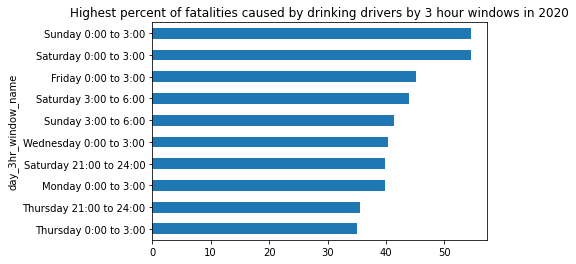

In [16]:
# Find max percent of drinking drivers and peds by 3 hour window in 2020

df_group_2020 = df_accident_ts[df_accident_ts["year"]==2020].groupby(by=["day_3hr_window_name"])[['fatals', "drunk_dr", "peds"]].agg(['sum', 'count'])
df_group_2020["drunk_percent"] = round( ( df_group_2020["drunk_dr", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 
df_group_2020["peds_percent"] = round( ( df_group_2020["peds", "sum"]/df_group_2020["fatals", "sum"] * 100), 2) 
df_group_2020.sort_values(by= "drunk_percent", ascending=False).head(10)["drunk_percent"].sort_values( ascending = True).plot(kind="barh", 
                                                    title = "Highest percent of fatalities caused by drinking drivers by 3 hour windows in 2020");


#### **Interpretation** : 
In 2020, 55% of fatalities were caused by drinking drivers during the worst 3 hour window of Sunday midnight to 3am. 
Overall across all 11 years, it was 57%. 

In 2020, there were 38491 fatalities. Average of 105 per day, or 4.4 per hour
During the worst 3 hour window of Saturday 21:00 to 24:00, there were a total of 1273 fatalities in 2020, average of 24.5 per week per this 3 hour window, i.e. 8.1 per hour. During Labor Day, it went up to 11 per hour. 

This is 1.84 times the hourly average of 4.4. 

In 2020, there were 9415 drinking driver fatalities. Average of 25.8 per day, or 1.1 per hour
During the worst 3 hour window of Sunday 0:00 to 3:00, there were a total of 610 drinking driver fatalities in 2020, average of 11.7 per week per this 3 hour window, i.e. 3.9 per hour. During Labor Day, it went up to 5.6 per hour. 

This is 3.5 times the hourly averge of 1.1 

Percent:
In 2020, 24.5% of fatalities (9415 out of 38491) involved drinking drivers. During weekend nights, this percent went up to 55%. During Labor Day, it went up to 89.5%

Holidays: 
Labor Day: 

Sunday 0:00 to 3:00	**19	17**	1	Labor Day	89.47  
Saturday 0:00 to 3:00	20	15	7	Labor Day	75.00  
Sunday 21:00 to 24:00	**33**	9	9	Labor Day	27.27  
Saturday 18:00 to 21:00	32	13	3	Labor Day	40.62  

In [17]:
# Find max percent of drinking drivers and peds by 3 hour window 

df_group = df_accident_ts.groupby(by=["day_3hr_window_name"])[['fatals', "drunk_dr", "peds"]].agg(['sum', 'count'])
df_group["drunk_percent"] = round( ( df_group["drunk_dr", "sum"]/df_group["fatals", "sum"] * 100), 2) 
df_group["peds_percent"] = round( ( df_group["peds", "sum"]/df_group["fatals", "sum"] * 100), 2) 


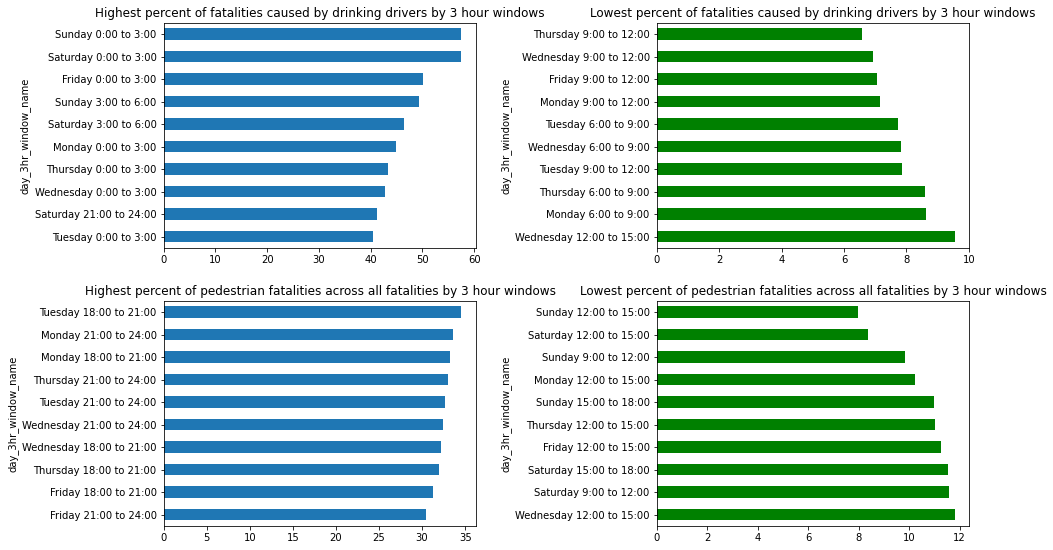

In [18]:

plt.figure(figsize=(14,8))

# 2 rows, 2 columns
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

df_group.sort_values(by= "drunk_percent", ascending=False).head(10)["drunk_percent"].sort_values( ascending = True).plot(kind="barh", 
                                                    ax=ax1, title = "Highest percent of fatalities caused by drinking drivers by 3 hour windows");


df_group.sort_values(by= "drunk_percent", ascending=True).head(10)["drunk_percent"].sort_values( ascending = False).plot(kind="barh", color="green",
                                                    ax=ax2, title = "Lowest percent of fatalities caused by drinking drivers by 3 hour windows");

df_group.sort_values(by= "peds_percent", ascending=False).head(10)["peds_percent"].sort_values( ascending = True).plot(kind="barh", 
                                                    ax=ax3, title = "Highest percent of pedestrian fatalities across all fatalities by 3 hour windows");

df_group.sort_values(by= "peds_percent", ascending=True).head(10)["peds_percent"].sort_values( ascending = False).plot(kind="barh", color="green",
                                                    ax=ax4, title = "Lowest percent of pedestrian fatalities across all fatalities by 3 hour windows");
plt.tight_layout(h_pad=2, pad=2, w_pad=2)


#### **Interpretation** : 57% of all fatalities are caused by drinking drivers on Saturday and Friday nights.  
Only 7% of fatalities are caused by drinking drivers on Wednesday and Thursday from 9am-noon. 


<Figure size 720x864 with 0 Axes>

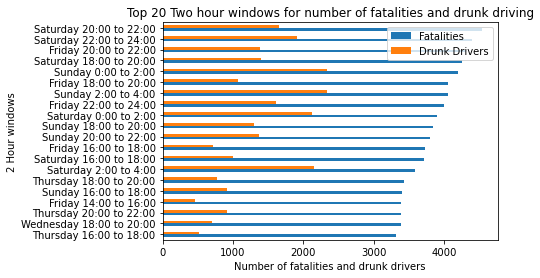

In [19]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_2hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Two hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("2 Hour windows");
plt.legend(labels=labels);


<Figure size 720x864 with 0 Axes>

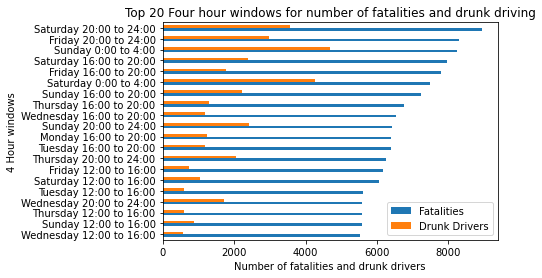

In [20]:
plt.figure(figsize=(10,12));
labels = ["Fatalities", "Drunk Drivers"];
df_accident_ts.groupby(by=["day_4hr_window_name"]).sum().sort_values(by= "fatals", 
                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).sort_values( by="fatals", ascending=True).plot(kind= 'barh');

plt.title("Top 20 Four hour windows for number of fatalities and drunk driving");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("4 Hour windows");
plt.legend(labels=labels);


In [21]:
#df_accident_ts.groupby("day_3hr_window")[[ "fatals", "day_weekname", "hour" ]].describe().head(10)


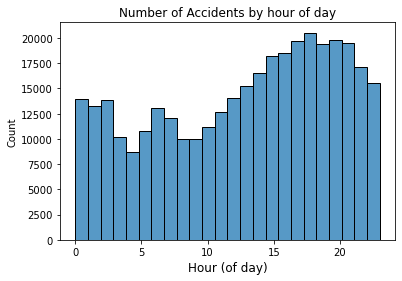

In [22]:
# Accidents by hour
plt.figure( figsize=(6,4))

# For the plot ignore the unknown (99) hours - they are less than 1%
sns.histplot(df_accident_ts[df_accident_ts['hour'] < 99 ]['hour'], bins = 24);
plt.title( "Number of Accidents by hour of day")
plt.xlabel("Hour (of day)", fontsize=12);
#plt.ylabel("Obscured By", fontsize=12);

# 6-10pm have the most accidents. Hour of day by itself is not revelaing, need to combine with weekend to see reall pattern



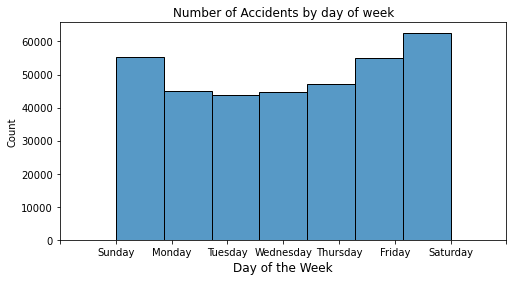

In [23]:

#Sun=1; Sat=7
day_weeknames = ["", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", ""]

# Accidents by day of week. Military time: midnight is 0000 (hour 0)
plt.figure( figsize=(8,4))
sns.histplot(df_accident_ts['day_week'] , bins = 7);

#sns.histplot(df_accident_ts['day_weekname'] , bins = 7);
plt.title( "Number of Accidents by day of week")
ticks_loc = plt.xticks()
plt.xticks(ticks_loc[0], day_weeknames)
plt.xlabel("Day of the Week", fontsize=12);
#plt.ylabel("Obscured By", fontsize=12);

# Saturday have the most accidents, followed by Sunday (probably Saturday night past midnight)



In [24]:
#df_accident[df_accident['day_week'] < 99 ]['hour'], bins = 24);
# 1 is Sunday; 7 is Saturday
df_accident_ts['day_week'].value_counts()

7    62642
1    55390
6    54955
5    47114
2    45090
4    44817
3    43756
Name: day_week, dtype: int64

<Figure size 864x576 with 0 Axes>

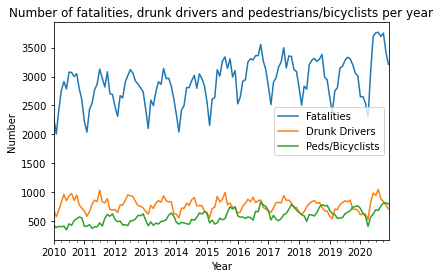

In [25]:
labels = ["Fatalities", "Drunk Drivers", "Peds/Bicyclists"]
plt.figure(figsize=(12,8));
df_accident_ts.resample("M").sum()[["fatals", "drunk_dr", "peds"]].plot()

plt.title ("Number of fatalities, drunk drivers and pedestrians/bicyclists per year");
plt.xlabel("Year");
plt.ylabel( "Number");
plt.legend(labels);



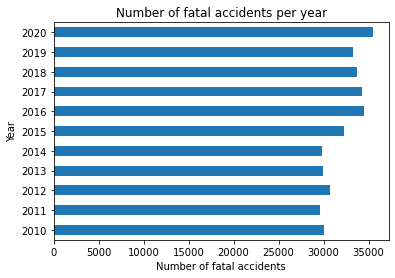

In [26]:
# observations per year
df_accident_ts['year'].value_counts(sort=False).plot(kind="barh");

#df_accident_ts.resample("M").count().plot();
plt.title ("Number of fatal accidents per year");
plt.xlabel("Number of fatal accidents");
plt.ylabel( "Year");

#### **Interpretation** : 
The number of accidents is roughly increasing every year 

In [27]:
df_2020 = df_accident_ts[df_accident_ts["year"]== 2020]
df_2019 = df_accident_ts[df_accident_ts["year"]== 2019]
df_2018 = df_accident_ts[df_accident_ts["year"]== 2018]


/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/209682203.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_accident_ts.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="All years")
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/209682203.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2020.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="2020")
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/209682203.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2019.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="2019")
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/209682203.py:4: FutureWarning: Indexing with multiple keys (impli

<AxesSubplot:title={'center':'2018'}, xlabel='month'>

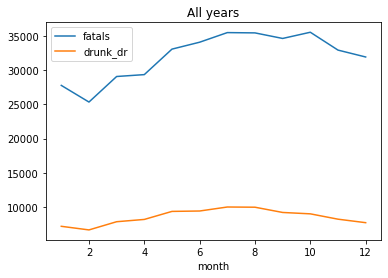

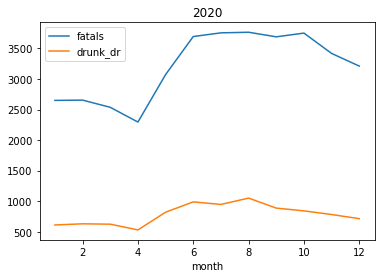

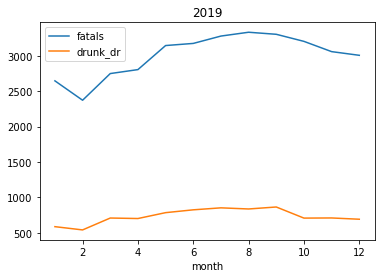

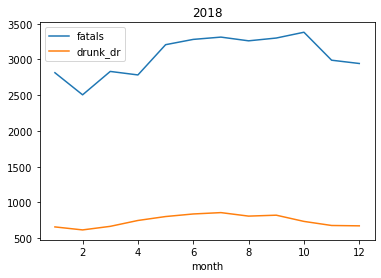

In [28]:
df_accident_ts.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="All years")
df_2020.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="2020")
df_2019.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="2019")
df_2018.groupby(by=[ "month"])["fatals", 'drunk_dr'].sum().plot(title="2018")

#df_accident_ts.groupby(by=["year", "month"])['drunk_dr'].sum().plot()

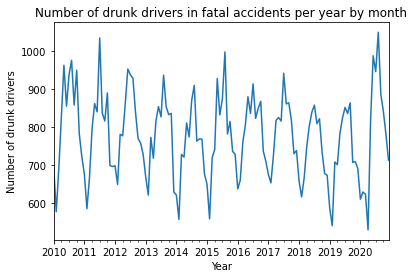

In [29]:
# Drunk drivers per year

#df_accident_ts.groupby(by="quarter")['drunk_dr'].sum().plot(kind="barh");
df_accident_ts.resample("M")['drunk_dr'].sum().plot();
plt.title ("Number of drunk drivers in fatal accidents per year by month");
plt.ylabel("Number of drunk drivers");
plt.xlabel( "Year");

In [30]:
df_model_hour = df_accident_ts.resample("H").sum()[["fatals", "drunk_dr", "peds", "ve_total", "persons" ]]
df_model_hour

,fatals,drunk_dr,peds,ve_total,persons
date_time,,,,,
2010-01-01 00:00:00,15,15,1,20,35
2010-01-01 01:00:00,9,6,1,13,24
2010-01-01 02:00:00,16,11,2,19,42
2010-01-01 03:00:00,15,12,3,28,38
2010-01-01 04:00:00,5,3,0,6,14
...,...,...,...,...,...
2020-12-31 19:00:00,6,3,2,11,19
2020-12-31 20:00:00,8,4,3,9,13
2020-12-31 21:00:00,3,0,1,5,5


In [31]:
# Check drunk driving during holidays in 2020

holidays = pd.DataFrame ({
    "holiday": ["NewYears", "Memorial Day", "Fourth of July", "Labor Day", "Thanksgiving", "Christmas"], 
    "start": ["2019-12-31 18:00", "2020-05-22 18:00", "2020-07-02 18:00", "2020-09-04 18:00", "2020-11-25 18:00", "2020-12-24 18:00"],
    "end": ["2020-01-02 05:59", "2020-05-26 05:59",  "2020-07-06 05:59",  "2020-09-08 05:59",  "2020-11-30 05:59",  "2020-12-28 05:59"],
    "fatals_sum" : [0]*6,
    "drunk_dr_sum" : [0]*6,
    "peds_sum" : [0]*6,
    "drunk_percent": [0]*6,
    "peds_percent": [0]*6,
})
 

In [32]:

# Across all holidays in 2020
                   
for i in range(0, holidays.shape[0]):
#    print( i)    
    #print( df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals", "drunk_dr"]].sum())
    holidays["fatals_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals"]].sum()
    holidays["drunk_dr_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["drunk_dr"]].sum()
    holidays["peds_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["peds"]].sum()
    holidays["drunk_percent"][i] =  round(( (holidays["drunk_dr_sum"][i]/holidays["fatals_sum"][i]) * 100), 2)
    holidays["peds_percent"][i] =  round(( (holidays["peds_sum"][i]/holidays["fatals_sum"][i]) * 100), 2)


/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/3967643273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays["fatals_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["fatals"]].sum()
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/3967643273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays["drunk_dr_sum"][i] =  df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]][["drunk_dr"]].sum()
/var/folders/06/2ml34kbd5jbg6988jmpwrgz00r_kcc/T/ipykernel_55769/3967643273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [33]:

holidays

,holiday,start,end,fatals_sum,drunk_dr_sum,peds_sum,drunk_percent,peds_percent
0,NewYears,2019-12-31 18:00,2020-01-02 05:59,152,70,39,46,25
1,Memorial Day,2020-05-22 18:00,2020-05-26 05:59,404,157,73,38,18
2,Fourth of July,2020-07-02 18:00,2020-07-06 05:59,488,171,83,35,17
3,Labor Day,2020-09-04 18:00,2020-09-08 05:59,524,169,99,32,18
4,Thanksgiving,2020-11-25 18:00,2020-11-30 05:59,511,136,120,26,23
5,Christmas,2020-12-24 18:00,2020-12-28 05:59,333,100,77,30,23


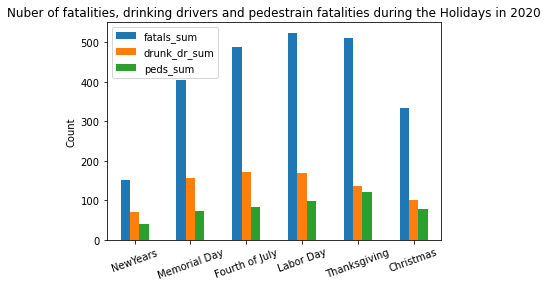

In [34]:
holidays[["fatals_sum", "drunk_dr_sum", "peds_sum"]].plot(kind= 'bar', 
                                                    title="Nuber of fatalities, drinking drivers and pedestrain fatalities during the Holidays in 2020");
plt.xticks(range(0,6), holidays["holiday"], rotation=20);
plt.ylabel("Count");


In [35]:
df_hol_stats_list = pd.DataFrame()

for i in range(0, holidays.shape[0]):
    #print( i)
    df_hol_stats= pd.DataFrame()
    
    df_hol_stats = (df_accident_ts.loc[holidays["start"][i] : holidays["end"][i]].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                    ascending=False)[["fatals", "drunk_dr", "peds"]].sort_values(by="drunk_dr", ascending=False))
    
    df_hol_stats["holiday"] = holidays.iloc[i]["holiday"]

    df_hol_stats["drunk_percent"] = round( ( df_hol_stats["drunk_dr"]/df_hol_stats["fatals"] * 100 ), 2) 
    df_hol_stats_list = df_hol_stats_list.append(df_hol_stats)
    
    #df_hol_stats.sort_values(by="drunk_percent", ascending=True)

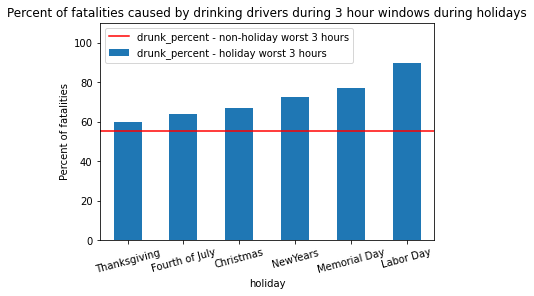

In [49]:
df_hol_stats_list.groupby('holiday')["drunk_percent"].max().sort_values().plot(kind="bar", label= "drunk_percent - holiday worst 3 hours")
plt.title(f"Percent of fatalities caused by drinking drivers during 3 hour windows during holidays");
plt.axhline( 55, color = "red", label="drunk_percent - non-holiday worst 3 hours")
plt.ylabel("Percent of fatalities");
plt.ylim(0, 110)
plt.xticks(rotation=15);
plt.legend(loc=2)


#### **Interpretation** : 
During Holidays, there are many more fatalities caused by drinking drivers than during the worst 3 hour windows on non-holidays.   
During the Labor Day weekend, 90% of the 19 fatalities were caused by drinking drivers on Sun between midnight and 3am, and 75% of the 20 fatalities on Sat between midnight and 3am. Both these percentages are well above the 55% of drinking driver fatalilities on non-holiday weekends.   

In 2020, of the total 9415 drinking driver fatalilites, 803 (8.5%) were during the 6 holidays. Fatalities were 2412 (6.3%) during the Holidays

Holidays: 803, 2412; 2020: 9415, 38491  

Sunday 0:00 to 3:00	**19	17**	1	Labor Day	89.47  
Saturday 0:00 to 3:00	20	15	7	Labor Day	75.00  
Sunday 21:00 to 24:00	**33**	9	9	Labor Day	27.27  
Saturday 18:00 to 21:00	32	13	3	Labor Day	40.62  

In [ ]:
#803/9415
2412/38491

0.06266399937647762

In [ ]:
#(df_accident_ts["year"]==2020).sum()
df_accident_ts[df_accident_ts["year"]==2020][["fatals", "drunk_dr"]].sum()

fatals      38491
drunk_dr     9415
dtype: int64

In [ ]:
df_hol_stats_list[df_hol_stats_list["holiday"] == "Labor Day"].sort_values(by="fatals", ascending=False)

,fatals,drunk_dr,peds,holiday,drunk_percent
day_3hr_window_name,,,,,
Sunday 21:00 to 24:00,33,9,9,Labor Day,27.27
Saturday 18:00 to 21:00,32,13,3,Labor Day,40.62
Friday 21:00 to 24:00,31,10,12,Labor Day,32.26
Saturday 21:00 to 24:00,31,8,12,Labor Day,25.81
Monday 21:00 to 24:00,27,10,9,Labor Day,37.04
Friday 18:00 to 21:00,24,10,4,Labor Day,41.67
Saturday 15:00 to 18:00,24,8,1,Labor Day,33.33
Sunday 18:00 to 21:00,23,3,3,Labor Day,13.04
Saturday 12:00 to 15:00,22,5,0,Labor Day,22.73


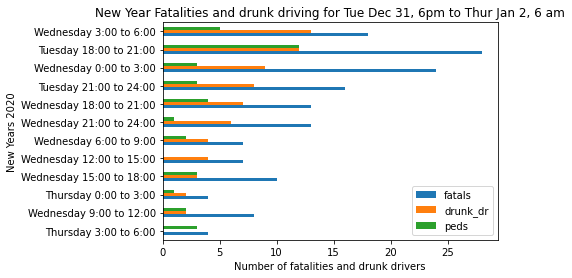

In [ ]:

#df_hol.groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
#                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).plot(kind= 'barh');


df_accident_ts.loc["2019-12-31 18:00": '2020-01-02 05:59'].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
                                ascending=False)[["fatals", "drunk_dr", "peds"]].head(20).sort_values(by="drunk_dr", ascending=True).plot(kind= 'barh');

#df_accident_ts.loc['2020-01-15': '2020-01-16'].groupby(by=["day_3hr_window_name"]).sum().sort_values(by= "fatals", 
#                                                    ascending=False)[["fatals", "drunk_dr"]].head(20).plot(kind= 'barh');

plt.title(f"New Year Fatalities and drunk driving for Tue Dec 31, 6pm to Thur Jan 2, 6 am");
plt.xlabel("Number of fatalities and drunk drivers");
plt.ylabel("New Years 2020");


<AxesSubplot:xlabel='date_time'>

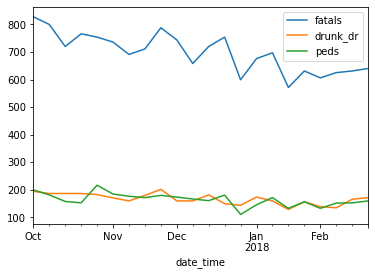

In [ ]:


df_model_week.loc["2017-10-01" : "2018-02-28"][["fatals", "drunk_dr", "peds"]].plot()
#df_model_hour.loc["2017-10-01" : "2018-02-28"][["fatals", "drunk_dr", "peds"]].plot(kind="line")

#df_model_week.groupby('Name').resample('W-Mon', on='Date').sum().reset_index().sort_values(by='Date')

#df = df.groupby(['Name', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Date')



In [ ]:
#df_accident_ts.groupby(by="month")['drunk_dr'].sum().plot(kind="line");
#df_accident_ts.groupby(by="week")['drunk_dr'].sum().plot(kind="line");
# Create new df for modeling which has the columns we need, by week


#df_plot = pd.DataFrame( df_accident_ts.groupby(by="year")['peds'].sum() )

#plt.bar(df_plot.index.values, df_plot['peds'])

#plt.title ("Number of Pedestrians in fatal accidents per year");

#add_value_label(df_plot.index.values, df_plot['peds'])

#plt.xlabel("Number of Pedestrians");
#plt.ylabel( "Year"); """

#df_accident_ts.resample("M")(['drunk_dr'/'fatals']).sum().plot();

#plt.title ("Percent of drunk drivers in fatal accidents per year by month");
#plt.ylabel("Percent of drunk drivers");
#plt.xlabel( "Year");

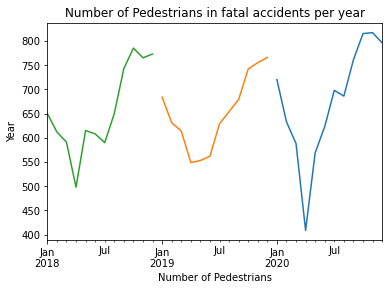

In [ ]:
df_2020.resample("M")['peds'].sum().plot();
df_2019.resample("M")['peds'].sum().plot();
df_2018.resample("M")['peds'].sum().plot();

plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

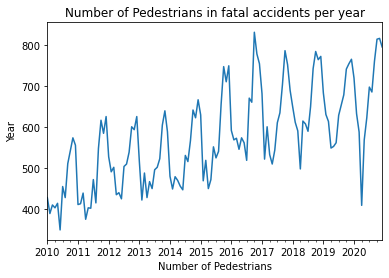

In [ ]:
#df_accident_ts.groupby(by="quarter")['drunk_dr'].sum().plot(kind="barh");
df_accident_ts.resample("M")['peds'].sum().plot();
plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

In [ ]:
# Bar chart with labels on top; xticks with custom tick and labels
def add_value_label(x_list,y_list):
    print( x_list, y_list)
    for i in range(1, len(x_list)+1):
        print( i, x_list[i], y_list[1] )
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center")
        # should the first param be i or i-1; web says i; but it was skipping one col
#        plt.text(i,y_list[i-1],y_list[i-1], ha="center") 

        


In [ ]:
""" 
plt.figure(figsize=(10,8))
## Make a bar chart to visualize coefficients Model 3
plt.bar(c_comparison_df["Model"], c_comparison_df['Accuracy'])
add_value_label(c_comparison_df["Model"], c_comparison_df['Accuracy'])

#c_comparison_df['Accuracy'].plot(kind='bar', figsize= (10,8), color='cornflowerblue', )

plt.ylim(0.2, 1.0);
plt.ylabel("Accuracy", size=15)
plt.xticks(np.arange(c_comparison_df.shape[0]), c_comparison_df["Model"], rotation=20, size=10);
plt.axhline(c_comparison_df["Baseline Score"][0], color='black', linestyle="--")
plt.title( "Accuracy of the models");
 """

' \nplt.figure(figsize=(10,8))\n## Make a bar chart to visualize coefficients Model 3\nplt.bar(c_comparison_df["Model"], c_comparison_df[\'Accuracy\'])\nadd_value_label(c_comparison_df["Model"], c_comparison_df[\'Accuracy\'])\n\n#c_comparison_df[\'Accuracy\'].plot(kind=\'bar\', figsize= (10,8), color=\'cornflowerblue\', )\n\nplt.ylim(0.2, 1.0);\nplt.ylabel("Accuracy", size=15)\nplt.xticks(np.arange(c_comparison_df.shape[0]), c_comparison_df["Model"], rotation=20, size=10);\nplt.axhline(c_comparison_df["Baseline Score"][0], color=\'black\', linestyle="--")\nplt.title( "Accuracy of the models");\n '

In [ ]:
df_accident_ts.groupby(by="year")['peds'].sum() 
# a little bit higher than the stats on NHTSA: 
# https://www-fars.nhtsa.dot.gov/Trends/TrendsGeneral.aspx

year
2010    5459
2011    5706
2012    6195
2013    6127
2014    6327
2015    7023
2016    7633
2017    7572
2018    7880
2019    7818
2020    8115
Name: peds, dtype: int64

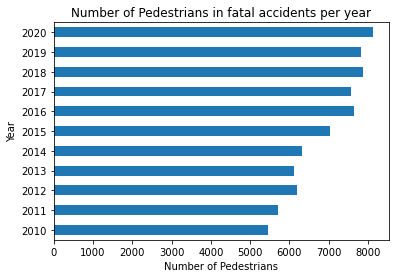

In [ ]:
# Pedestrains per year

df_accident_ts.groupby(by="year")['peds'].sum().plot(kind="barh");

plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

In [ ]:
""" 
# Labels not working....

# Pedestrains per year

#df_accident_ts.groupby(by="year")['peds'].sum().plot(kind="bar");

df_plot = pd.DataFrame( df_accident_ts.groupby(by="year")['peds'].sum() )

plt.bar(df_plot.index.values, df_plot['peds'])

plt.title ("Number of Pedestrians in fatal accidents per year");

add_value_label(df_plot.index.values, df_plot['peds'])

plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year"); """

' \n# Labels not working....\n\n# Pedestrains per year\n\n#df_accident_ts.groupby(by="year")[\'peds\'].sum().plot(kind="bar");\n\ndf_plot = pd.DataFrame( df_accident_ts.groupby(by="year")[\'peds\'].sum() )\n\nplt.bar(df_plot.index.values, df_plot[\'peds\'])\n\nplt.title ("Number of Pedestrians in fatal accidents per year");\n\nadd_value_label(df_plot.index.values, df_plot[\'peds\'])\n\nplt.xlabel("Number of Pedestrians");\nplt.ylabel( "Year"); '

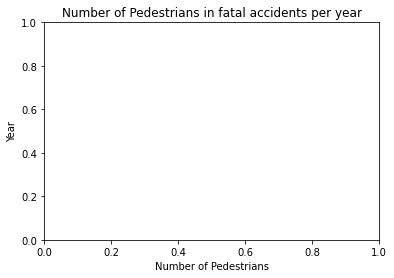

In [ ]:
# weather per year

#df_accident_ts.groupby(by=["year"])["weathername"].plot(kind="barh")
plt.title ("Number of Pedestrians in fatal accidents per year");
plt.xlabel("Number of Pedestrians");
plt.ylabel( "Year");

In [ ]:
df_accident_ts["cityname"].value_counts().sum() # SF has only 149 and is ranked 70, LA has 1387; NA: 84k!!
# 8k cities; total rows: 171178; half have Not Applicable (outside city limits)

# city: SF=3290
# state: CA: 6: 33k records


171178

Text(0.5, 1.0, 'Number of accidents by State')

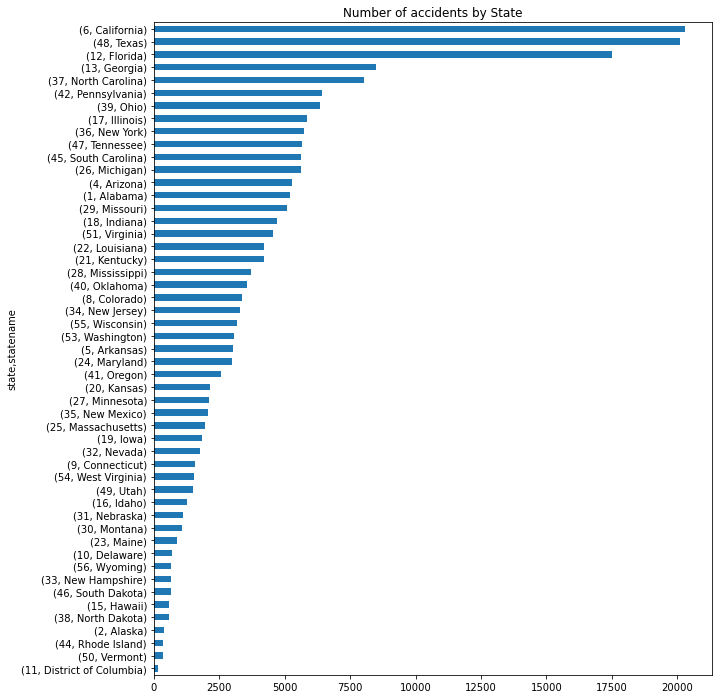

In [ ]:
plt.figure( figsize=(10,12))
df_accident_ts[["state", "statename"]].value_counts(ascending=True).plot(kind="barh")
plt.title("Number of accidents by State")

In [ ]:
# 8k cities, dont graph
#plt.figure( figsize=(10,12))
#df_accident_ts[["city", "cityname"]].value_counts(ascending=True).plot(kind="barh")
#plt.title("Number of accidents by City")

In [ ]:
df_accident_ts[(df_accident_ts["state"]<9996) & df_accident_ts["statename"].isnull()] [["city", "cityname", "state", "statename"]]

#df_accident_ts[df_accident_ts["city"]<9996][["city", "state", "statename"]]

,city,cityname,state,statename
date_time,,,,
2010-01-15 04:10:00,2340,NaN,1,NaN
2010-01-11 06:00:00,1080,NaN,1,NaN
2010-01-14 15:10:00,2100,NaN,1,NaN
2010-01-21 01:16:00,160,NaN,1,NaN
2010-01-04 06:38:00,0,NaN,1,NaN
...,...,...,...,...
2014-12-04 22:37:00,0,NaN,56,NaN
2014-12-13 07:36:00,0,NaN,56,NaN
2014-12-21 02:10:00,730,NaN,56,NaN


In [ ]:
#df_accident_ts.dtypes

In [ ]:
# Let's scoop lat/long up in a matrix so we can use them easily

geo = df_accident_ts[["longitud", "latitude"]]
geo.head()

,longitud,latitude
date_time,,
2010-01-15 04:10:00,-85.354692,32.641064
2010-01-11 06:00:00,-86.956694,31.430447
2010-01-14 15:10:00,-88.085778,30.691631
2010-01-21 01:16:00,-86.291164,33.868700
2010-01-04 06:38:00,-86.787222,33.309742


In [ ]:
# Let's cluster our observations by lat/long
# Let's cluster our observations by lat/long
km = KMeans(n_clusters = 20)
km.fit(geo)

KMeans(n_clusters=20)

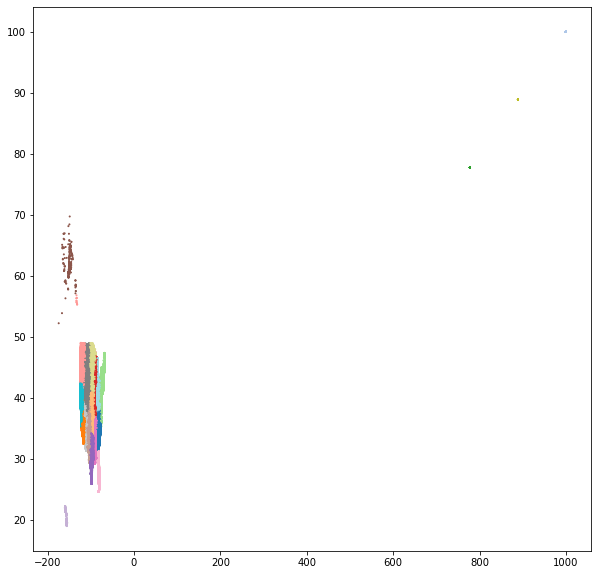

In [ ]:
# What do these clusters look like visually?
# Need to put over a map of these lat/longs
plt.figure(figsize=(10, 10))
plt.scatter(df_accident_ts["longitud"] , df_accident_ts["latitude"], c=km.labels_, s=1, cmap="tab20");

# plt.scatter(df_accident_ts[df_accident_ts["longitud"]] , df_accident_ts[df_accident_ts["latitude"]], c=km.labels_, s=1, cmap="tab20");

In [ ]:
 # sum by month
df_accident_ts.resample("M").sum()[["fatals", "drunk_dr", "peds"]]

,fatals,drunk_dr,peds
date_time,,,
2010-01-31,2285,694,428
2010-02-28,2005,577,389
2010-03-31,2424,691,410
2010-04-30,2764,825,403
2010-05-31,2912,963,414
...,...,...,...
2020-08-31,3765,1050,686
2020-09-30,3690,886,761
2020-10-31,3751,841,815


<AxesSubplot:xlabel='date_time'>

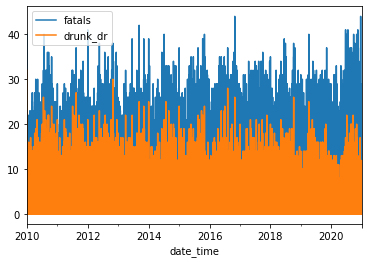

In [ ]:
 # sum in 3hour windows
df_accident_ts.resample("3H").sum()[["fatals", "drunk_dr"]].plot()